# Making figure 7 of paper
23/03/2025

In [1]:
import bagpipes as pipes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.lines import Line2D

plt.rcParams.update({'font.size': 16})
import seaborn as sns
import os
from bagpipes import plotting
pipes.plotting.update_rcParams()
matplotlib.rcParams["axes.linewidth"] = 1.0

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

Starting dense_basis. Failed to load FSPS, only GP-SFH module will be available.


In [2]:
# change working directory to one layer above
os.chdir('..')
# set saving direction
save_dir = 'plots/'

In [26]:
# load in percentiles tables
RPSB_percentiles = pd.read_csv('data/posterior_percentiles_RPSB_PSB.csv')
central_percentiles = pd.read_csv('data/Table4.csv')

# convert halftime to in Gyr units
for p in [16,50,84]:
    RPSB_percentiles[f'halftime_{p}'] = RPSB_percentiles[f'halftime_{p}']/1000
    
# calculate the log of HaEW
central_percentiles['median_log_haEW_centre'] = np.log10(central_percentiles['median_haEW_centre'])
    
# join the two tables together
percentiles = pd.merge(RPSB_percentiles, 
                       central_percentiles[['plateifu', 'ssfr_16', 'ssfr_50', 'ssfr_84', 'median_log_haEW_centre']], on='plateifu', how='left')
# rename ssfr into centralspx_ssfr
percentiles = percentiles.rename(columns={'ssfr_16':'centralspx_ssfr_16', 'ssfr_50':'centralspx_ssfr_50', 'ssfr_84':'centralspx_ssfr_84'})

# make a filter for galaxies with poorly fit centres
mask_bad_central_fit = np.isnan(percentiles['centralspx_ssfr_16'])

In [27]:
ylabels = {
    "age": "$\\mathrm{Age}/\\mathrm{Gyr}$",
    "tau": "$\\tau/\\mathrm{Gyr}$",
    "alpha1": "$\\alpha_1$",
    "burstage": "$\\mathrm{Burst\\ Age}\\ /\\ \\mathrm{Gyr}$",
    "alpha2": "$\\alpha_2$",
    "alpha": "$\\alpha$",
    "halftime": "Half time $\\tau_{1/2}\\ /\\ \\mathrm{Gyr}$",
    "log_halftime": "$\\log_{10}$ Half time $\\tau_{1/2}\\ /\\ \\mathrm{Gyr}$",
    "fburst" : "Burst mass fraction",
    "massformed": "mass formed / $\\mathrm{log_{10}(M_*/M_{\\odot})}$",
    "stellar_mass": "stellar mass / $\\mathrm{log_{10}(M_*/M_{\\odot})}$",
    "redshift": "Redshift",
    "veldisp": "$\\sigma_{vel}$",
    "sfr": "$\\mathrm{SFR}\\mathrm{M_\\odot\\ yr}^{-1}$",
    "ssfr": "$\\mathrm{log_{10}(sSFR\\mathrm{yr}^{-1})}$",
    "metallicity_old": "$Z_\\mathrm{old}/Z_{\\odot}$",
    "metallicity_burst": "$Z_\\mathrm{burst}/Z_{\\odot}$",
    "metallicity_slope": "$Z_\\mathrm{slope}/Z_{\\odot}\\ Gyr^{-1}$",
    "metallicity": "metallicity / $Z_*/Z_{\\odot}$",
    "metallicity_diff": "Metallicity change / $(Z_\\mathrm{burst} - Z_\\mathrm{old})/Z_{\\odot}$",
    "MW_zmet": "$Z_\\mathrm{*,MW}/Z_{\\odot}$",
    "log_MW_zmet_diff": "$\\log(Z_\\mathrm{*,MW}/Z_{\\odot}) - \\log(Z_\\mathrm{old}/Z_{\\odot})$",
    "log_metallicity_old": "Pre-burst metallicity / $\\log(Z_\\mathrm{old}/Z_{\\odot})$",
    "log_metallicity_burst": "Post-burst metallicity / $\\log(Z_\\mathrm{burst}/Z_{\\odot})$",
    "f1.0": "M(1.0Gyr) / M(total)",
    "f1.5": "M(1.5Gyr) / M(total)",
    "tquench_from_1": "quenching timescale $\\tau_{q2}\\ /\\ \\mathrm{Gyr}$",
    "tquench_from_peak": "quenching timescale $\\tau_{q1}\\ /\\ \\mathrm{Gyr}$",
    "Av": "$\\mathrm{A_V}$",
    "eta": "$\eta_{\\mathrm{dust}}$",
    'median_haEW_centre': "Central median $\\mathrm{W(H}\\alpha)\\ / \\ \\mathrm{\\AA}$",
    'median_log_haEW_centre': "Central median $\\log_{10}(\\mathrm{W(H}\\alpha)\\ / \\ \\mathrm{\\AA})$",
    "centralspx_sfr_50": "Central fitted $\\mathrm{SFR}\\ /\\mathrm{M_\\odot\\ yr}^{-1}$",
    "centralspx_log_sfr_50": "Central fitted $\\log_{10}\\mathrm{SFR}\\ / \\log_{10}(\\mathrm{M_\\odot\\ yr}^{-1})$",
    "centralspx_ssfr_50": "Central fitted $\\mathrm{log_{10}(sSFR\\mathrm{yr}^{-1})}$",
    "centralspx_MWage_50": "Central fitted mass-weighted age / Gyr",
}

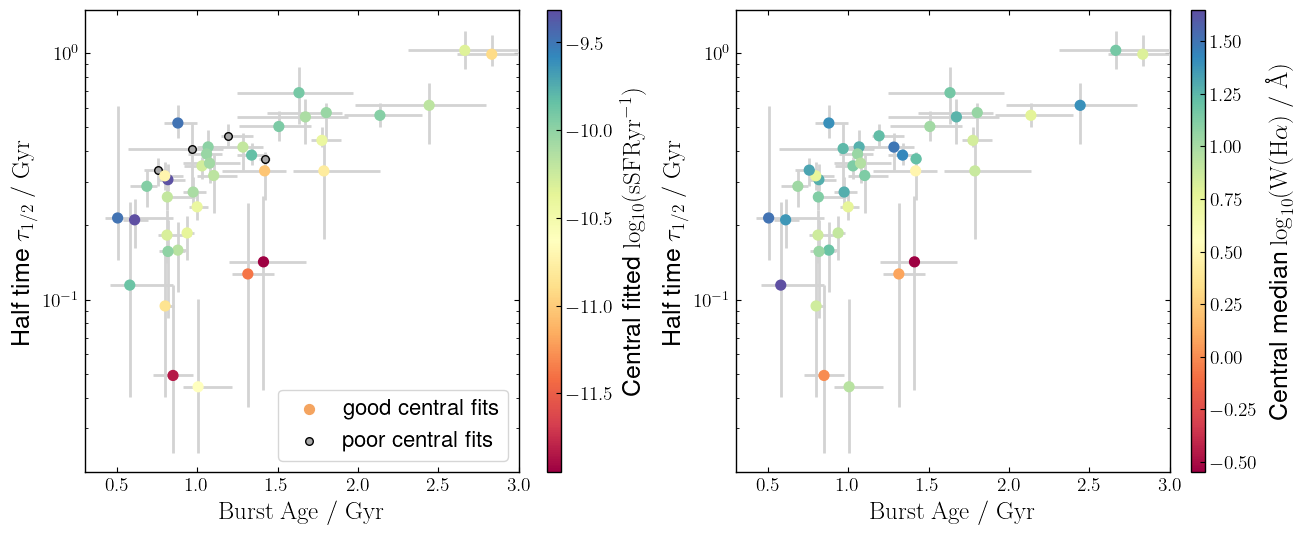

In [30]:
from matplotlib.legend_handler import HandlerTuple

# specifiy the dataframe columns we want plotted as colours
color_col = ['centralspx_ssfr_50', 'median_log_haEW_centre']

# specify colormap
cmap = 'Spectral'

fig = plt.figure(figsize=[14,6])
gs = fig.add_gridspec(1,2, wspace=0.5, hspace=0.15)
ax = gs.subplots()

for i in range(2):
    
    xparam = 'burstage'
    yparam = 'halftime'
    xims = [0.3,3.0]
    ylims = [0.02,1.5]
    
    axi = ax[i]
    axi.set_yscale('log')

    axi.set_xlim([0.3,3.0])
    axi.set_ylim([0.02,1.5])
        
    if i==0:
        vmin = percentiles[~mask_bad_central_fit][color_col[i]].min()
        vmax = percentiles[~mask_bad_central_fit][color_col[i]].max()
        
        # good central fits
        s2 = axi.scatter(percentiles[xparam+'_50'][~mask_bad_central_fit], 
                                percentiles[yparam+'_50'][~mask_bad_central_fit], 
                                c=percentiles[color_col[i]][~mask_bad_central_fit], 
                                vmin=vmin, vmax=vmax, cmap=cmap, s=50, zorder=11)

        # bad central fits
        axi.scatter(percentiles[xparam+'_50'][mask_bad_central_fit], 
                            percentiles[yparam+'_50'][mask_bad_central_fit], 
                            color='darkgray', edgecolor='k', s=30, zorder=9)
            
    elif i==1:
        vmin = percentiles[color_col[i]].min()
        vmax = percentiles[color_col[i]].max()

        s2 = axi.scatter(percentiles[xparam+'_50'], 
                         percentiles[yparam+'_50'], 
                         c=percentiles[color_col[i]], 
                         vmin=vmin, vmax=vmax, cmap=cmap, s=50, zorder=11)
    
    # errorbars
    axi.errorbar(percentiles[xparam+'_50'], 
                 percentiles[yparam+'_50'], 
                 xerr=[percentiles[xparam+'_50']-percentiles[xparam+'_16'], 
                       percentiles[xparam+'_84']-percentiles[xparam+'_50']],
                 yerr=[percentiles[yparam+'_50']-percentiles[yparam+'_16'], 
                       percentiles[yparam+'_84']-percentiles[yparam+'_50']],
                 color='lightgray', fmt='none', zorder=8
                )
    
    axi.set_xlabel(ylabels[xparam])
    axi.set_ylabel(ylabels[yparam])
    
    
    # add colorbar
    if i==0:
        cax2 = fig.add_axes([0.455, 0.11, 0.01, 0.77])
    elif i==1:
        cax2 = fig.add_axes([0.915, 0.11, 0.01, 0.77])
    fig.colorbar(s2, cax=cax2, orientation='vertical', label=ylabels[color_col[i]])
    
    # legend
    if i==0:
        s1 = axi.scatter([],[], facecolor='sandybrown', edgecolor='sandybrown', marker='o', s=50)
        s4 = axi.scatter([],[], facecolor='darkgray', edgecolor='k', marker='o', s=30)
        axi.legend([s1, s4], ['good central fits', 'poor central fits'], handletextpad=0.5, loc='lower right',
                     fontsize=16)

plt.show()